In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [ ]:
# we may only be able to use continuous independant variables in regression 
# mant variables are actually categorical , as in i do not believed they can be used in the larger model
# this will specify our results to square footages and lot square footages wtih maybe some others 
# others will need to be treated as linear regression wiht the against the same independant , house grade 

# both models have different set ups, this is going to take awhile 

In [130]:
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.head(2)
house_data.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [128]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'decadeBuilt'],
      dtype='object')

In [4]:
df = house_data
conditions = [
    np.logical_and(df['yr_built'].ge(1900), pd.Series.lt(df['yr_built'], 1909)),
    np.logical_and(df['yr_built'].ge(1910), pd.Series.lt(df['yr_built'], 1919)),
    np.logical_and(df['yr_built'].ge(1920), pd.Series.lt(df['yr_built'], 1929)),
    np.logical_and(df['yr_built'].ge(1930), pd.Series.lt(df['yr_built'], 1939)),
    np.logical_and(df['yr_built'].ge(1940), pd.Series.lt(df['yr_built'], 1949)),
    np.logical_and(df['yr_built'].ge(1950), pd.Series.lt(df['yr_built'], 1959)),
    np.logical_and(df['yr_built'].ge(1960), pd.Series.lt(df['yr_built'], 1969)),
    np.logical_and(df['yr_built'].ge(1970), pd.Series.lt(df['yr_built'], 1979)),
    np.logical_and(df['yr_built'].ge(1980), pd.Series.lt(df['yr_built'], 1989)),
    np.logical_and(df['yr_built'].ge(1990), pd.Series.lt(df['yr_built'], 1999)),
    np.logical_and(df['yr_built'].ge(2000), pd.Series.lt(df['yr_built'], 2009)),
    np.logical_and(df['yr_built'].ge(2010), pd.Series.lt(df['yr_built'], 2019)),
]

outputs = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

house_data['decadeBuilt'] = pd.Series(np.select(conditions,  outputs))
house_data['decadeBuilt'].value_counts()



2000    3285
1960    2378
0       2337
1950    2116
1980    1991
1990    1969
1970    1942
1940    1568
2010    1241
1920    1078
1910     717
1900     551
1930     424
Name: decadeBuilt, dtype: int64

In [10]:
test_data = house_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15', 
                        'grade', 'price'
                       ]]

# Drop id nulls and duplicates 
test_data['id'].dropna(inplace = True)
test_data.drop_duplicates(subset= 'id', keep='first', inplace=True, ignore_index = True)


# bedrooms drop all greater than 6
test_data.drop(test_data.index[test_data['bedrooms'] >= 7], inplace = True)


#bathrooms remove all bathroom values less than 1
test_data = test_data[test_data.bathrooms >= 1.0]
test_data['bathrooms'].dropna(inplace = True)

# Cast grade column as categorical 
test_data.grade = test_data['grade'].astype("category")

# need to ensure values are properly indexed ie. very low correlates to the lowest number 



/var/folders/yz/0dpd9f1x7vb0v9x4tcb5n1bh0000gn/T/ipykernel_20966/2278158063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset= 'id', keep='first', inplace=True, ignore_index = True)


In [134]:
abs(house_data.corr()) > 0.         

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
price,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
bedrooms,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True
bathrooms,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True
sqft_living,True,True,True,False,False,True,True,False,True,True,True,True,True,False,True
sqft_lot,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
floors,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
sqft_above,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True
yr_built,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
yr_renovated,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True


In [ ]:
# need to create two seperate dataframes from test data 
# need to seperate categoric and numeric indepndant variables
# equation for categoric variables vs. categoric 'grade'     ---- oridnal regression
# equation for numeric vs categoric 'grade'    -- 

In [ ]:
# PLAN 

"""
need to first take each variable i suspect has a relationship to grade and compare them via linear regression 
*** this should be a quick process once we figure out how to
*** do them each each with categorical and continuous varibale

from this can extract p values or whatever value correlates to strength of relationship (correlation coefficient)

can take the highest relationship variables are perform a multi linear regression and an ordinal regression 

***
will then repeat process for price with  all same independant variables using 
same process as for grade except all against continuous dependent price 

***
will then need to find a relationship among features, and build the highest rated home below
the median home price 



fuck :(



will show evolution of meodeling, logical reasoning / research based on the goal 
will allow for learning of both single and multi linear regression while completing project 

"""

In [ ]:
# CLEANING
"""
Need to clean each category of outliers before final regressions
need to determine if categorical variables are ordinal or nominal 


Outlier removal: 
Bedrooms 
    Do i treat all bedrooms above 6 as 6 or remove all above 6 





"""

In [11]:
test_data.dtypes

id                  int64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
sqft_above          int64
yr_built            int64
zipcode             int64
sqft_living15       int64
sqft_lot15          int64
grade            category
price             float64
dtype: object

In [13]:
test_data.head(2)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,grade,price
0,7129300520,3,1.00,1180,5650,1.0,1180,1955,98178,1340,5650,7 Average,221900.0
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,98125,1690,7639,7 Average,538000.0


In [73]:
# Testing simple linear regression, continuous variables against price 

target = 'price'
X = test_data.loc[:, ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']]
y = test_data.loc[:, 'price']

In [74]:
# lr = LinearRegression()

In [75]:
X = sm.add_constant(X)
model = sm.OLS(y, X)

In [76]:
results = model.fit()
results.params

const           -101947.657038
sqft_living         245.749249
sqft_living15        70.307638
sqft_lot              0.064750
sqft_lot15           -0.805117
dtype: float64

In [77]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     5375.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:10:00   Log-Likelihood:            -2.9643e+05
No. Observations:               21346   AIC:                         5.929e+05
Df Residuals:                   21341   BIC:                         5.929e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.019e+05   5468.666    -18.642

In [81]:
test_data.dtypes

id                  int64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
sqft_above          int64
yr_built            int64
zipcode             int64
sqft_living15       int64
sqft_lot15          int64
grade            category
price             float64
dtype: object

## Casting grade as ordinal rather than just categorical, in the correct value order <br>*checked-complete- works*

In [88]:
from pandas.api.types import CategoricalDtype

In [89]:
cat_type = CategoricalDtype(categories=['4 Low', '5 Fair', '6 Low Average', '7 Average',
                                        '8 Good','9 Better', '10 Very Good', '11 Excellent',
                                        '12 Luxury', '13 Mansion'], ordered=True)

In [90]:
test_data.grade = test_data['grade'].astype(cat_type)

In [96]:
# categorical ordering test 
# test_data.grade.cat.categories
# test_data.grade.cat.ordered
# test_data.grade.max()
# test_data.grade.min()
test_data.grade

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21413         9 Better
21414           8 Good
21415           8 Good
21416           8 Good
21418           8 Good
Name: grade, Length: 21346, dtype: category
Categories (10, object): ['4 Low' < '5 Fair' < '6 Low Average' < '7 Average' ... '10 Very Good' < '11 Excellent' < '12 Luxury' < '13 Mansion']

/Users/austinboring/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

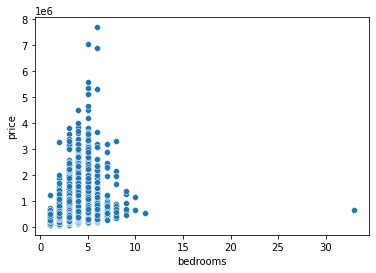

In [126]:
sns.scatterplot(test_data.bedrooms, test_data.price)

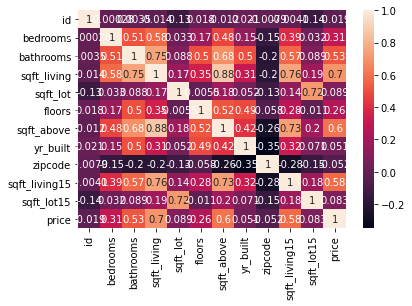

In [125]:
# test_data.corr()
sns.heatmap(test_data.corr(), annot = True);


In [127]:
mod_prob = OrderedModel(test_data['grade'],
                        test_data[[ 'sqft_living', 'bedrooms', 'bathrooms']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

         Current function value: 1.063247
         Iterations: 49
         Function evaluations: 132
         Gradient evaluations: 120


/Users/austinboring/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  grade   Log-Likelihood:                -22696.
Model:                   OrderedModel   AIC:                         4.542e+04
Method:            Maximum Likelihood   BIC:                         4.551e+04
Date:                Wed, 30 Mar 2022                                         
Time:                        09:40:09                                         
No. Observations:               21346                                         
Df Residuals:                   21334                                         
Df Model:                          12                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
sqft_living                   0.0012   1.89e-05     63.431      0.000       0.001       0.001
bedrooms                     -0.2729      0.012    -23.196      0.000      -0.296      -0.250
bathrooms                     0.6164      0.018     34.213      0.000       0.581       0.652
4 Low/5 Fair                 -1.6702      0.060    -27.849      0.000      -1.788      -1.553
5 Fair/6 Low Average          0.1661      0.007     23.579      0.000       0.152       0.180
6 Low Average/7 Average       0.3156      0.020     15.826      0.000       0.277       0.355
7 Average/8 Good              0.6782      0.009     73.400      0.000       0.660       0.696
8 Good/9 Better               0.3071      0.011     27.631      0.000       0.285       0.329
9 Better/10 Very Good         0.1342      0.017      7.697      0.000       0.100       0.168
10 Very Good/11 Excellent     0.2333      0.027      8.724      0.000       0.181       0.286
11 Excellent/12 Luxury        0.5090      0.045     11.223      0.000       0.420       0.598
12 Luxury/13 Mansion          1.0445      0.083     12.551      0.000       0.881       1.208
=============================================================================================
"""

In [99]:
# remove all homes with bedrooms greater than 
test_data.bedrooms = test_data['bedrooms'].astype('category')

3     9715
4     6846
2     2708
5     1586
6      265
1      164
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
test_data.bedrooms.value_counts()

/Users/austinboring/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

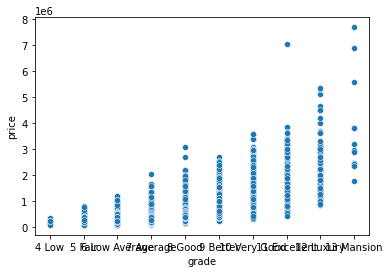

In [108]:
sns.scatterplot(test_data.grade, test_data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

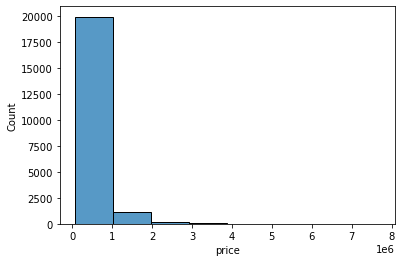

In [113]:
sns.histplot(test_data.price, bins = 8)

In [ ]:
"""
Example workflow : Creating the entire test dataframe of all variables 
more specific dataframes can be extracted from this finalized and prepped dataframe 

what this is doing is log trasnforming all data to normalize the distributions 
then scaling the data points of the log transformed data using several different techniques per the notes
scaling brings the values within a reasonable range of one another 

creates dummy columns for each of the categorical variables, dropping one of each column to prevent 
perfect multicollinearity 

concatenates each step of the preproccessing into a single dataframe, including the target 

ready for regression !!!! 


notes : 
can use dummy varibales in the future to create mroe specific dataframes for specific regressions 
"""
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

<AxesSubplot:xlabel='price', ylabel='Count'>

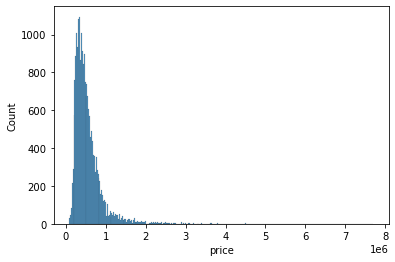

In [165]:
sns.histplot(test_data.price)

/var/folders/yz/0dpd9f1x7vb0v9x4tcb5n1bh0000gn/T/ipykernel_20966/711969298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['price_log'] = test_data['price'].map(lambda x: np.log(x))


<AxesSubplot:xlabel='price_log', ylabel='Count'>

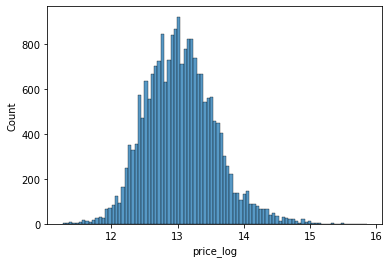

In [166]:
test_data['price_log'] = test_data['price'].map(lambda x: np.log(x))   
sns.histplot(test_data.price_log)

In [153]:
log_bedrooms = np.log(house_data['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='Frequency'>

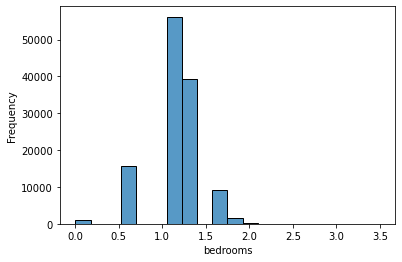

In [154]:
sns.histplot(data = log_bedrooms, bins = 20, stat = 'frequency')

<AxesSubplot:xlabel='bedrooms', ylabel='Frequency'>

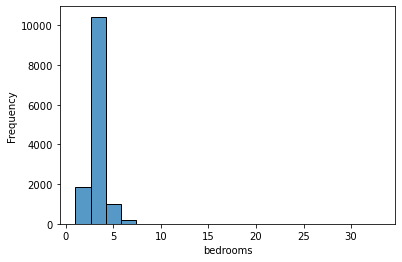

In [155]:
sns.histplot(data = house_data['bedrooms'], bins = 20, stat = 'frequency')

In [140]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [170]:
house_data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [163]:
house_data.waterfront.isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [136]:
lr = LinearRegression()
lr

LinearRegression()

In [158]:
test_data = house_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
                        'condition','grade', 'yr_built', 'zipcode', 'price'
                       ]]
features = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
            'grade', 'yr_built', 'zipcode', 'price']
X = test_data[features]
y = test_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [138]:
print(len(X_train))
print(len(X_test))

15117
6480


In [139]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'NO'